In [38]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline


In [16]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [17]:
from imblearn.over_sampling import SMOTE

In [18]:
data=pd.read_csv(r'C:\Users\cleme\Desktop\IronHack\Project_7\data_clean.csv')
data

,Bankrupt?,Operating_Gross_Margin,Operating_Profit_Rate,After-tax_net_Interest_Rate,Non-industry_income_and_expenditure/revenue,Operating_Expense_Rate,Research_and_development_expense_rate,Cash_flow_rate,Interest-bearing_debt_interest_rate,Tax_rate_(A),...,Liability-Assets_Flag,Net_Income_to_Total_Assets,Total_assets_to_GNP_price,No-credit_Interval,Net_Income_to_Stockholder's_Equity,Liability_to_Equity,Degree_of_Financial_Leverage_(DFL),Interest_Coverage_Ratio_(Interest_expense_to_EBIT),Net_Income_Flag,Equity_to_Liability
0,1,0.601457,0.998969,0.808809,0.302646,1.256969e-04,0.000000e+00,0.458143,7.250725e-04,0.000000,...,0,0.716845,0.009219,0.622879,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.610235,0.998946,0.809301,0.303556,2.897851e-04,0.000000e+00,0.461867,6.470647e-04,0.000000,...,0,0.795297,0.008323,0.623652,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.601450,0.998857,0.808388,0.302035,2.361297e-04,2.550000e+07,0.458521,7.900790e-04,0.000000,...,0,0.774670,0.040003,0.623841,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.583541,0.998700,0.808966,0.303350,1.078888e-04,0.000000e+00,0.465705,4.490449e-04,0.000000,...,0,0.739555,0.003252,0.622929,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.598783,0.998973,0.809304,0.303475,7.890000e+09,0.000000e+00,0.462746,6.860686e-04,0.000000,...,0,0.795016,0.003878,0.623521,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.604455,0.998992,0.809331,0.303510,1.510213e-04,4.500000e+09,0.463734,1.790179e-04,0.113372,...,0,0.799927,0.000466,0.623620,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.598308,0.998992,0.809327,0.303520,5.220000e+09,1.440000e+09,0.461978,2.370237e-04,0.371596,...,0,0.799748,0.001959,0.623931,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.610444,0.998984,0.809317,0.303512,2.509312e-04,1.039086e-04,0.472189,0.000000e+00,0.490839,...,0,0.797778,0.002840,0.624156,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.607850,0.999074,0.809399,0.303498,1.236154e-04,2.510000e+09,0.476123,2.110211e-04,0.181294,...,0,0.811808,0.002837,0.623957,0.841084,0.277547,0.026822,0.565302,1,0.044009


# --------------Features Selection-------------------------------------

In [19]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

In [20]:
X = data.drop(['Bankrupt?'], axis = 1)
y = data['Bankrupt?']

In [21]:
rfe_selector = RFE(estimator=RandomForestClassifier(),n_features_to_select = 19, step = 1)
m=rfe_selector.fit(X, y)
X.columns[m.get_support()]
print("Num Features: %s" % (m.n_features_))
print("Selected Features: %s" % (m.support_))
print("Feature Ranking: %s" % (m.ranking_))

Num Features: 19
Selected Features: [False False False  True False False False  True False  True False False
 False False False False False False  True False False False  True  True
  True  True  True False False  True False False  True False False False
 False False False False False False False  True False  True False False
 False False False  True False False  True False False False False False
 False False False False False False False False  True False False  True
 False  True  True False False]
Feature Ranking: [36 42  4  1  5 34 29  1 57  1 43 23 35 37 41 44 25 21  1  8 54 27  1  1
  1  1  1 30 56  1 26 51  1 16 20  2 39  9 11 13 15 52 38  1 19  1 22 49
  3 47 46  1 55 14  1 48 17 28 18 40 53 31 32 24 45 50 33 58  1 10  6  1
 12  1  1 59  7]


In [22]:
X.loc[:, m.support_].columns

Index(['Non-industry_income_and_expenditure/revenue',
       'Interest-bearing_debt_interest_rate', 'Net_Value_Per_Share_(A)',
       'Net_Value_Growth_Rate', 'Quick_Ratio', 'Interest_Expense_Ratio',
       'Total_debt/Total_net_worth', 'Debt_ratio_%', 'Net_worth/Assets',
       'Net_profit_before_tax/Paid-in_capital', 'Accounts_Receivable_Turnover',
       'Cash/Total_Assets', 'Cash/Current_Liability', 'Working_Capital/Equity',
       'Total_income/Total_expense', 'Net_Income_to_Total_Assets',
       'Net_Income_to_Stockholder's_Equity',
       'Degree_of_Financial_Leverage_(DFL)',
       'Interest_Coverage_Ratio_(Interest_expense_to_EBIT)'],
      dtype='object')

In [23]:
X=X.loc[:, m.support_]

In [8]:
#--------------Splitting between train set and test set----------------------------

In [24]:
X

,Non-industry_income_and_expenditure/revenue,Interest-bearing_debt_interest_rate,Net_Value_Per_Share_(A),Net_Value_Growth_Rate,Quick_Ratio,Interest_Expense_Ratio,Total_debt/Total_net_worth,Debt_ratio_%,Net_worth/Assets,Net_profit_before_tax/Paid-in_capital,Accounts_Receivable_Turnover,Cash/Total_Assets,Cash/Current_Liability,Working_Capital/Equity,Total_income/Total_expense,Net_Income_to_Total_Assets,Net_Income_to_Stockholder's_Equity,Degree_of_Financial_Leverage_(DFL),Interest_Coverage_Ratio_(Interest_expense_to_EBIT)
0,0.302646,7.250725e-04,0.147950,0.000327,0.001208,0.629951,0.021266,0.207576,0.792424,0.137757,0.001814,0.004094,1.473360e-04,0.721275,0.002022,0.716845,0.827890,0.026601,0.564050
1,0.303556,6.470647e-04,0.182251,0.000443,0.004039,0.635172,0.012502,0.171176,0.828824,0.168962,0.001286,0.014948,1.383910e-03,0.731975,0.002226,0.795297,0.839969,0.264577,0.570175
2,0.302035,7.900790e-04,0.177911,0.000396,0.005348,0.629631,0.021248,0.207516,0.792484,0.148036,0.001495,0.000991,5.340000e+09,0.742729,0.002060,0.774670,0.836774,0.026555,0.563706
3,0.303350,4.490449e-04,0.154187,0.000382,0.002896,0.630228,0.009572,0.151465,0.848535,0.147561,0.001966,0.018851,1.010646e-03,0.729825,0.001831,0.739555,0.834697,0.026697,0.564663
4,0.303475,6.860686e-04,0.167502,0.000439,0.003727,0.636055,0.005150,0.106509,0.893491,0.167461,0.001449,0.014161,6.804636e-04,0.732000,0.002224,0.795016,0.839973,0.024752,0.575617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0.303510,1.790179e-04,0.175045,0.000450,0.005457,0.631415,0.006655,0.124618,0.875382,0.171111,0.000690,0.099481,5.071548e-03,0.736716,0.002266,0.799927,0.840359,0.027064,0.566193
6815,0.303520,2.370237e-04,0.181324,0.000445,0.006741,0.631489,0.004623,0.099253,0.900747,0.171805,0.000655,0.080337,4.727181e-03,0.734584,0.002288,0.799748,0.840306,0.027009,0.566018
6816,0.303512,0.000000e+00,0.269521,0.000435,0.035112,0.630612,0.001392,0.038939,0.961061,0.172287,0.001510,0.412885,8.821248e-02,0.737432,0.002239,0.797778,0.840138,0.026791,0.565158
6817,0.303498,2.110211e-04,0.213392,0.000529,0.007256,0.630731,0.003816,0.086979,0.913021,0.182498,0.000716,0.112238,7.133218e-03,0.736713,0.002395,0.811808,0.841084,0.026822,0.565302


In [43]:
# define pipeline
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X, y = pipeline.fit_resample(X, y)

In [44]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [45]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1383, 19)
(1383,)
(594, 19)
(594,)


# --------------Gaussian Process Classifier----------------------------

In [46]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
kernel = 1.0 * RBF(1.0)
gpc = GaussianProcessClassifier(kernel=kernel, random_state=0).fit(x_train, y_train)

In [47]:
y_pred_gpc=gpc.predict(x_test)

In [48]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_gpc)

In [49]:
confusion_matrix

array([[345,  37],
       [ 57, 155]], dtype=int64)

In [50]:
def generate_results(model, predictions, name):
    cl_rep = classification_report(y_test, predictions)
    print("\nThe classification report for " + name + " is:", cl_rep, sep = "\n")
    cm_model = metrics.confusion_matrix(y_test, predictions)
    plt.figure(figsize = (8, 6))
    sns.heatmap(cm_model, annot = True, cmap = 'Blues', annot_kws = {'size': 15}, square = True)
    plt.title('Confusion Matrix for ' + name, size = 15)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.show() 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


The classification report for Gaussian Process Classifier is:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       382
           1       0.81      0.73      0.77       212

    accuracy                           0.84       594
   macro avg       0.83      0.82      0.82       594
weighted avg       0.84      0.84      0.84       594



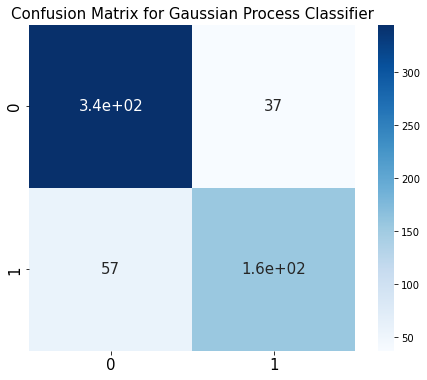

In [51]:
generate_results(gpc, y_pred_gpc, 'Gaussian Process Classifier')

In [52]:
#from sklearn.metrics import roc_auc_score
#print(metrics.roc_auc_score(x_test["y_initial"],x_test["y_pred"]))

In [53]:
from sklearn.metrics import roc_auc_score
print(metrics.roc_auc_score(y_test,y_pred_gpc))

0.8171367183641214


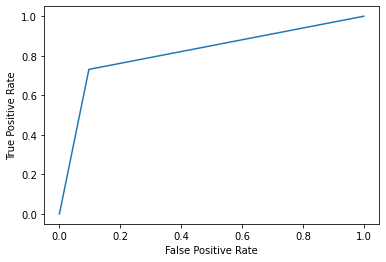

In [54]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred_gpc)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr)
display.plot()
plt.show()

# --------------TPOT CLASSIFIER----------------------------

In [100]:
# check tpot version
import tpot
print('tpot: %s' % tpot.__version__)

tpot: 0.11.7


C:\Users\cleme\anaconda3\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [101]:
from tpot import TPOTClassifier

In [102]:
pipeline_optimizer = TPOTClassifier(generations=5, population_size=20, cv=5,
                                    random_state=42, verbosity=2)

In [103]:
pipeline_optimizer.fit(x_train, y_train)

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8958509914717732

Generation 2 - Current best internal CV score: 0.8973002668340919

Generation 3 - Current best internal CV score: 0.8980379846177995

Generation 4 - Current best internal CV score: 0.8987364620938628

Generation 5 - Current best internal CV score: 0.9030816721603097

Best pipeline: XGBClassifier(input_matrix, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=100, n_jobs=1, subsample=1.0, verbosity=0)


TPOTClassifier(generations=5, population_size=20, random_state=42, verbosity=2)

# --------------BaggingClassifier----------------------------

In [104]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

In [105]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

#
bgclassifier = BaggingClassifier( n_estimators=20,
                                 max_features=0.25,
                                 max_samples=20,
                                 random_state=1, n_jobs=-1)
#
# Fit the bagging classifier
#
bgclassifier.fit(x_train, y_train)
#
# Model scores on test and training data
#
print('Model test Score: %.3f, ' %bgclassifier.score(x_test, y_test),
      'Model training Score: %.3f' %bgclassifier.score(x_train, y_train))

Model test Score: 0.843,  Model training Score: 0.840


In [106]:
y_pred_bgg = bgclassifier.predict(x_test)

In [107]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_bgg)
confusion_matrix

array([[349,  33],
       [ 60, 152]], dtype=int64)


The classification report for BaggingClassifier is:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       382
           1       0.82      0.72      0.77       212

    accuracy                           0.84       594
   macro avg       0.84      0.82      0.82       594
weighted avg       0.84      0.84      0.84       594



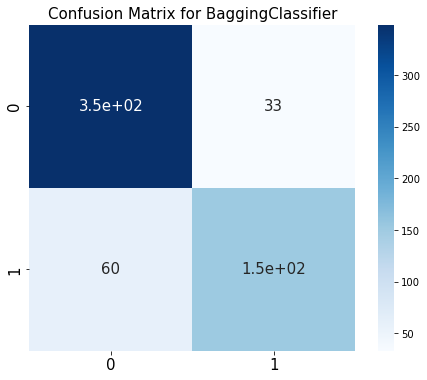

In [108]:
generate_results(bgclassifier, y_pred_bgg, 'BaggingClassifier')

In [109]:
print(metrics.roc_auc_score(y_test,y_pred_bgg))

0.8152968487602489


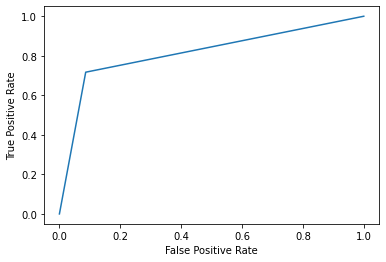

In [110]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred_bgg)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr)
display.plot()
plt.show()

 # ------------------MultinomialNB------------------------

In [111]:
from sklearn.naive_bayes import MultinomialNB
MNBclf = MultinomialNB()
MNBclf.fit(x_train, y_train)

MultinomialNB()

In [112]:
y_pred__MNB = MNBclf.predict(x_test)


In [113]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred__MNB )
confusion_matrix

array([[381,   1],
       [188,  24]], dtype=int64)


The classification report for MultinomialNB is:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80       382
           1       0.96      0.11      0.20       212

    accuracy                           0.68       594
   macro avg       0.81      0.56      0.50       594
weighted avg       0.77      0.68      0.59       594



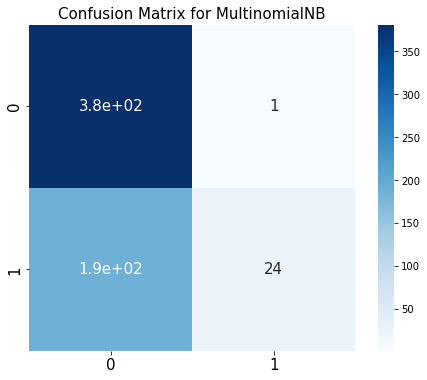

In [114]:
generate_results(MNBclf, y_pred__MNB, 'MultinomialNB')

In [115]:
print(metrics.roc_auc_score(y_test,y_pred__MNB))

0.5552948730613454


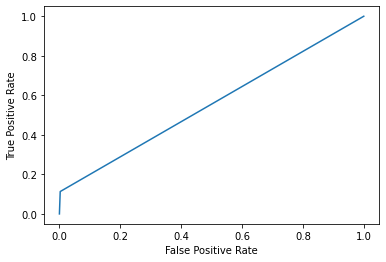

In [116]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred__MNB)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr)
display.plot()
plt.show()

# # ------------------QuadraticDiscriminantAnalysis------------------------

In [117]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf = QuadraticDiscriminantAnalysis()
clf.fit(x_train, y_train)

C:\Users\cleme\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [118]:
y_pred_clf=clf.predict(x_test)

In [119]:
y_test

1499    1
924     0
417     0
821     0
1299    0
       ..
1623    1
138     0
61      0
384     0
668     0
Name: Bankrupt?, Length: 594, dtype: int64

In [120]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_clf)
confusion_matrix

array([[372,  10],
       [173,  39]], dtype=int64)

In [121]:
metrics.confusion_matrix(y_test, y_pred_clf)

array([[372,  10],
       [173,  39]], dtype=int64)


The classification report for Quadratic Discriminant Analysis is:
              precision    recall  f1-score   support

           0       0.68      0.97      0.80       382
           1       0.80      0.18      0.30       212

    accuracy                           0.69       594
   macro avg       0.74      0.58      0.55       594
weighted avg       0.72      0.69      0.62       594



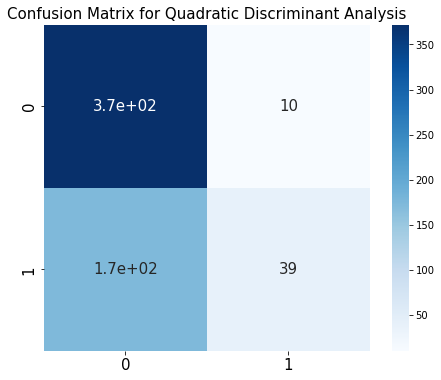

In [122]:
generate_results(clf, y_pred_clf, 'Quadratic Discriminant Analysis')

In [123]:
print(metrics.roc_auc_score(y_test,y_pred_clf))

0.5788921268398696


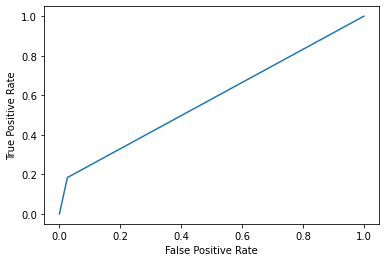

In [124]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred_clf)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr)
display.plot()
plt.show()

# # ------------------Stacking------------------------

In [125]:
from sklearn.svm import NuSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [126]:
estimators = [('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
     ('knn', KNeighborsClassifier(n_neighbors=1)),
     ('SVC', NuSVC(nu=0.0345, class_weight='balanced'))]
stack_clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression())

In [127]:
stack_clf.fit(x_train, y_train).score(x_test, y_test)

0.6683501683501684

In [128]:
y_pred_stack=stack_clf.predict(x_test)

In [129]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_stack)
confusion_matrix

array([[379,   3],
       [194,  18]], dtype=int64)


The classification report for Stacking  is:
              precision    recall  f1-score   support

           0       0.66      0.99      0.79       382
           1       0.86      0.08      0.15       212

    accuracy                           0.67       594
   macro avg       0.76      0.54      0.47       594
weighted avg       0.73      0.67      0.57       594



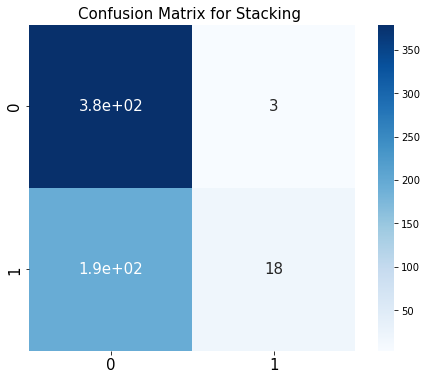

In [130]:
generate_results(stack_clf, y_pred_stack, 'Stacking ')

In [131]:
print(metrics.roc_auc_score(y_test,y_pred_stack))

0.5385261286179986


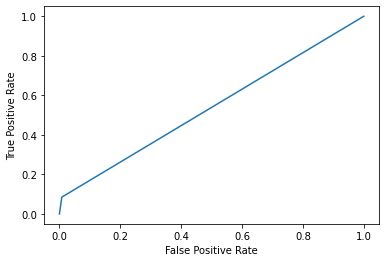

In [132]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred_stack)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr)
display.plot()
plt.show()

# # ------------------RandomForestClassifier------------------------


In [133]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred_rfc = rfc.predict(x_test)
acc_rfc = rfc.score(x_test, y_test)
print('The accuracy of the Random Forest Classifier is:', acc_rfc * 100, '%')

The accuracy of the Random Forest Classifier is: 92.76094276094277 %



The classification report for RandomForestClassifier is:
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       382
           1       0.88      0.93      0.90       212

    accuracy                           0.93       594
   macro avg       0.92      0.93      0.92       594
weighted avg       0.93      0.93      0.93       594



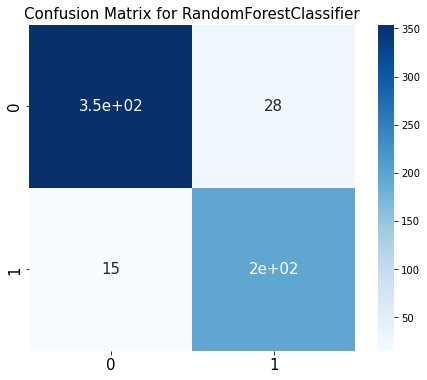

In [134]:
generate_results(rfc, y_pred_rfc, 'RandomForestClassifier')

In [135]:
print(metrics.roc_auc_score(y_test,y_pred_rfc))

0.927973426849748


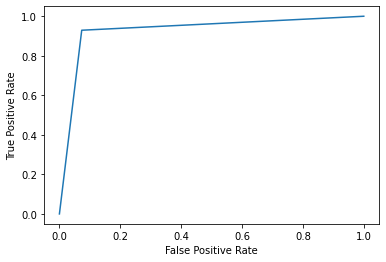

In [136]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred_rfc)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr)
display.plot()
plt.show()